# Skin Cancer: Malignant vs Benign - Part 2 - Machine Learning

Here follow the second part of the porject, where it will be applied the machine learning model.


## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading data

### Train Data

In [2]:
# Load train data
with np.load('train_data.npz') as train_npz_file:
    X_train_features = train_npz_file['features']
    Y_train_images = train_npz_file['image']
    z_train_label = train_npz_file['label']
    
print('X train features:', X_train_features.shape, X_train_features.dtype)
print('Y train images:',Y_train_images.shape,Y_train_images.dtype)
print('z train label:', z_train_label.shape, z_train_label.dtype)

X train features: (2637, 1280) float32
Y train images: (2637, 224, 224, 3) float32
z train label: (2637,) int64


### Test Data

In [3]:
# Load test data
with np.load('test_data.npz') as test_npz_file:
    X_test_features = test_npz_file['features']
    Y_test_images = test_npz_file['image']
    z_test_labels = test_npz_file['label']
    
print('X test features:', X_test_features.shape, X_test_features.dtype)
print('Y test images:',Y_test_images.shape,Y_test_images.dtype )
print('z test labels:', z_test_labels.shape, z_test_labels.dtype)

X test features: (660, 1280) float32
Y test images: (660, 224, 224, 3) float32
z test labels: (660,) int64


## Showing Images
Here it will be showed some images of the two kind of Skin Cancer.

In [4]:
# Creating the function 
def show_images(idx,Y,z):
    # Filtering the images (to get the desired category)
    Images = Y[z==idx]
    

    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12,3))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax) 
        plt.imshow(Images[i])
        plt.title('Image: {}'.format(i))
        plt.axis('Off')

### Benign Cancer

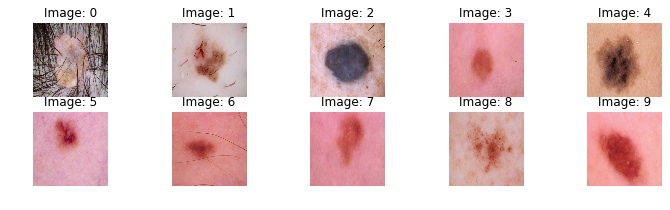

In [5]:
show_images(0,Y_train_images,z_train_label)

### Malignant Cancer

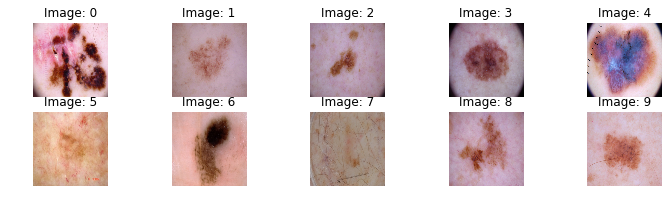

In [6]:
show_images(1,Y_train_images,z_train_label)

## Machine Learning
Here follow the implementation of three different machine model calssifier, retrive form the _Scikit-learn_ library. They will be evaluated on the accuracy. 

>All these machine learning will **not** be tuned with a validation data set to increase their performance, they will just trained and then tested.



In [7]:
# Laoding the common package
from sklearn.pipeline import Pipeline

### K-NN
Here folow the implementaiton of the _Nearest Neighbors_ model.

In [8]:
# Loading the necessary package
from sklearn.neighbors import KNeighborsClassifier

# Creating the classifier
knn = KNeighborsClassifier(n_neighbors=10, algorithm='brute', n_jobs=-1)

# Create the pipeline
knn_pipe = Pipeline([
    ('scaler',None),
    ('knn', knn),
])

In [9]:
# Training the classifier
knn_pipe.fit(X_train_features,z_train_label)

Pipeline(steps=[('scaler', None),
                ('knn',
                 KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                      n_neighbors=10))])

In [10]:
# Testing the classifier, getting the accuracy
knn_test_accuracy = knn_pipe.score(X_test_features, z_test_labels)


In [11]:
# Create df
accuracy_score = {'model':['k-NN'], 'Accuracy': [knn_test_accuracy]}
accuracy_score_df= pd.DataFrame(accuracy_score)

# Viweing the df
accuracy_score_df

,model,Accuracy
0,k-NN,0.55303


### Linear SVC Classifier

In [12]:
# Loading the package
from sklearn.svm import LinearSVC

# Creating classifier
linear = LinearSVC(C=1, loss='hinge', max_iter=1000)

# Create the pipeline
linear_pipe = Pipeline([
    ('scaler',None),
    ('linear', linear),
])


In [13]:
# Train
linear_pipe.fit(X_train_features,z_train_label)

C:\Users\admin\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', None), ('linear', LinearSVC(C=1, loss='hinge'))])

In [14]:
# Test, retrive accuracy
linear_accuracy = linear_pipe.score(X_test_features, z_test_labels)

In [15]:
# Adding to the DF
accuracy_score_df = accuracy_score_df.append({'model': 'Linear SVC', 'Accuracy': linear_accuracy}, ignore_index=True)

### Tree Classifier

In [17]:
# Loading the package
from sklearn.tree import DecisionTreeClassifier

# Creating the classifier
TreeClassifier = DecisionTreeClassifier(criterion='gini', splitter='best')

# Create the pipeline
Tree_Pipe = Pipeline([
    ('scaler',None),
    ('Tree', TreeClassifier),
])

In [18]:
# Training the model
Tree_Pipe.fit(X_train_features,z_train_label)

Pipeline(steps=[('scaler', None), ('Tree', DecisionTreeClassifier())])

In [19]:
# Test, retrive the accuracy
tree_accuracy = Tree_Pipe.score(X_test_features, z_test_labels)

In [20]:
# Add the value to the dataframe
accuracy_score_df = accuracy_score_df.append({'model':'Tree Classifier', 'Accuracy': tree_accuracy}, ignore_index =True)

## Plotting the result

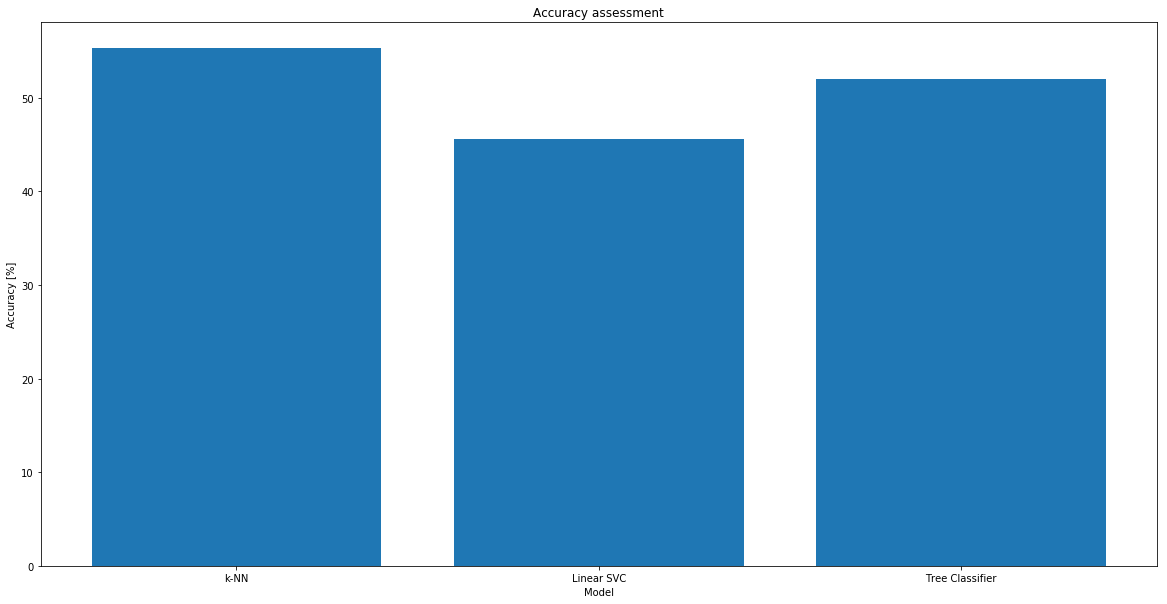

In [24]:
# Plotting the bar chart
plt.figure(figsize=(20,10))
plt.bar(accuracy_score_df['model'], accuracy_score_df['Accuracy']*100)
plt.xlabel('Model')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy assessment');

**Graph comment**: From the graph above, it is possible to see that the best classifier reuslt in the K-NN.

## Conclusion
From this small exercise, it is possible to see that different classifier can be applied to classify the image of Skin Cancer. The best of the three resulted in the K-NN.
>**Important**: It is necessary to say that the reuslt could have been better, if the model were tuned with a validation data set and use other parameter of each model.

Possible future ideas:
* Tune the model;
* Retrive more data;
* Implement a Neural Network;
* Possibility to build an app for using it on smartphone with test patient (Only with medical personnel and with authorization)